# Image Similarity using ANNOY  

Dataset: https://www.kaggle.com/datasets/huangruichu/caltech101

In [1]:
#install necessary libraries
import os #for file maipulation 
import time #time related functions
import pickle #to access and use pickle format files
import numpy as np
import pandas as pd
from numpy.linalg import norm # normalisation of data
from tqdm import tqdm, tqdm_notebook #track status of model processing
import keras.utils as image #deep learning libraries
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
#Initialize Model
#we are using a resnet50 model and using pretrained weights on imagenet dataset but excluding the last layer
#so more or less it is for generating embeddings
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model

In [3]:
cd

C:\Users\yashs


In [4]:
os.chdir(r"D:\education\machine learning\projects\annoy and image_similarity")#get to the folder where the data is present

In [5]:
cwd = os.getcwd()
cwd
#current working directory

'D:\\education\\machine learning\\projects\\annoy and image_similarity'

In [6]:
root_dir = "Caltech101/Caltech101/train"

In [7]:
#Find Images in the Root Directiry and making list of those Images
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [8]:
for root, dirs, files in os.walk(root_dir):
        print (root,"this is root")
        print (dirs,"this is dir")
        print (files,"this is files")
        print ('--------------------------------')

Caltech101/Caltech101/train this is root
['accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_

In [9]:
filenames = sorted(get_file_list(root_dir))
len(filenames)

6162

In [10]:
filenames

['Caltech101/Caltech101/train\\Faces\\image_0001.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0003.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0005.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0006.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0007.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0008.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0009.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0010.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0011.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0012.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0014.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0015.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0016.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0017.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0018.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0019.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0021.jpg',
 'Caltech101/Caltech101/train\\Faces\\image_0022.jpg',
 'Caltech1

In [11]:
input_shape = (224, 224, 3)
img = image.load_img(filenames[0], target_size=(input_shape[0], input_shape[1])) #Reshape input image size into target size
img_array = image.img_to_array(img)
img_array.shape

(224, 224, 3)

In [12]:
expanded_img_array = np.expand_dims(img_array, axis=0)
expanded_img_array.shape

(1, 224, 224, 3)

In [13]:
#Define Function to extract Features
def extract_features(img_path, model):
    
    #Preprocessing Input Image
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1])) #Reshape input image size into target size
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    
    
    #Getting features from the Image
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [ ]:
#Extracting Features from each Image and saving them in a list
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

C:\Users\yashs\AppData\Local\Temp\ipykernel_5944\238565725.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(filenames))):


  0%|          | 0/6162 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


#Making pickle file of filenames and features of each files for future references
pickle.dump(feature_list, open('./features-caltech101-resnet.pickle', 'wb'))
pickle.dump(filenames, open('./filenames-caltech101.pickle','wb'))

In [14]:
#Getting filenames and features from pickle files
filenames = pickle.load(open('./filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('./features-caltech101-resnet.pickle', 'rb'))

In [15]:
filenames

['../input/caltech101/Caltech101/Caltech101/train/Faces/image_0001.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0003.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0005.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0006.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0007.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0008.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0009.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0010.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0011.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0012.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0014.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0015.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/Faces/image_0016.jpg',
 '../input/caltech101/Caltech101/Caltech101/train/F

In [16]:
feature_list

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00195984], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.02202978, 0.        ,
        0.        ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00211062], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.00382426, 0.        ,
        0.        ], dtype=float32),
 array([0.000e+00, 0.000e+00, 0.000e+00, ..., 9.769e-05, 0.000e+00,
      

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #data augmentation, we are rescaling the inputs,Generate batches of tensor image data with real-time data augmentation.

train_generator = train_datagen.flow_from_directory('Caltech101/Caltech101/train',
                                                   class_mode='categorical')

Found 6162 images belonging to 101 classes.


In [18]:
train_generator.filenames[0]

'Faces\\image_0001.jpg'

In [19]:
len(train_generator.filenames)

6162

In [20]:
train_generator.filenames[0].split("\\")

['Faces', 'image_0001.jpg']

In [21]:
#Extracting image name and labels of each Image to make a dataframe that can be used later while using annoy

file_names = []
labels = []
for files in train_generator.filenames:
    file = files.split('\\')[1]
    label = files.split('\\')[0]
    file_names.append(file)
    labels.append(label)

In [22]:
file_names #only names and no label

['image_0001.jpg',
 'image_0003.jpg',
 'image_0005.jpg',
 'image_0006.jpg',
 'image_0007.jpg',
 'image_0008.jpg',
 'image_0009.jpg',
 'image_0010.jpg',
 'image_0011.jpg',
 'image_0012.jpg',
 'image_0014.jpg',
 'image_0015.jpg',
 'image_0016.jpg',
 'image_0017.jpg',
 'image_0018.jpg',
 'image_0019.jpg',
 'image_0021.jpg',
 'image_0022.jpg',
 'image_0023.jpg',
 'image_0025.jpg',
 'image_0026.jpg',
 'image_0027.jpg',
 'image_0028.jpg',
 'image_0029.jpg',
 'image_0031.jpg',
 'image_0033.jpg',
 'image_0034.jpg',
 'image_0035.jpg',
 'image_0037.jpg',
 'image_0038.jpg',
 'image_0040.jpg',
 'image_0041.jpg',
 'image_0042.jpg',
 'image_0043.jpg',
 'image_0044.jpg',
 'image_0045.jpg',
 'image_0047.jpg',
 'image_0049.jpg',
 'image_0050.jpg',
 'image_0051.jpg',
 'image_0052.jpg',
 'image_0054.jpg',
 'image_0055.jpg',
 'image_0057.jpg',
 'image_0060.jpg',
 'image_0061.jpg',
 'image_0062.jpg',
 'image_0064.jpg',
 'image_0066.jpg',
 'image_0067.jpg',
 'image_0068.jpg',
 'image_0069.jpg',
 'image_0070

In [23]:
labels#corresponding labels to file

['Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',
 'Faces',


In [24]:
#Forming dataframe containing Image Id, Features of Images and Labels of the Images\
df = pd.DataFrame({'img_id':file_names, 'img_repr': feature_list, 'label': labels})

In [25]:
df

,img_id,img_repr,label
0,image_0001.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Faces
1,image_0003.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Faces
2,image_0005.jpg,"[0.0, 0.0, 0.0, 0.008832973, 0.0, 0.0, 0.0, 0....",Faces
3,image_0006.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Faces
4,image_0007.jpg,"[0.0, 0.0, 0.0, 0.0028253994, 0.0, 0.0, 0.0, 0...",Faces
...,...,...,...
6157,image_0055.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00011503717, ...",yin_yang
6158,image_0056.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",yin_yang
6159,image_0057.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",yin_yang
6160,image_0058.jpg,"[0.0, 0.001969602, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",yin_yang


Using Spotify's Annoy for Similarity Search


In [26]:
len(df['img_repr'][0])

100352

In [27]:
from annoy import AnnoyIndex
import random

f = len(df['img_repr'][0])
t = AnnoyIndex(f, metric='euclidean')

for i in tqdm(range(len(feature_list))):
    t.add_item(i, feature_list[i])
    
_ = t.build(250) #250 trees

100%|██████████| 6162/6162 [01:06<00:00, 92.92it/s] 


In [28]:
#Defining function to get similar images output in dataframe of the base image index we give as parameter
def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector, base_label  = df.iloc[img_index, [0, 1, 2]]
    similar_img_ids = t.get_nns_by_item(img_index, 8)
    end = time.time()
    # Now we want to get the 5 elements sorted by its euclidean distance relative to the image indexed item
    print(f'{(end - start) * 1000} ms')
    return base_img_id, base_label, df.iloc[similar_img_ids[1:]]

In [29]:
#Querying the AnnoyIndex    
base_image, base_label, similar_images_df = get_similar_images_annoy(4000)

1546.2555885314941 ms


In [30]:
print('Base Image Id:', base_image)
print('Base Image Label:', base_label)

Base Image Id: image_0042.jpg
Base Image Label: ibis


In [31]:
#Dataframe of similar images
similar_images_df

,img_id,img_repr,label
4008,image_0051.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ibis
3972,image_0004.jpg,"[0.0, 0.0, 0.0017034006, 0.0, 0.0, 0.0, 0.0, 0...",ibis
3978,image_0011.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ibis
3977,image_0010.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ibis
3993,image_0031.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ibis
3983,image_0018.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ibis
3998,image_0040.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ibis


Plotting Base and Similar Images

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

In [33]:
def show_images(root_dir):
    plt.figure(figsize = (16,9))
    
    plt.subplot(1,8,1)
    path = os.path.join(root_dir, base_label, base_image)
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.title('Base Image')
    plt.axis('off')
    
    for i in range(len(similar_images_df)):
        path = os.path.join(root_dir, similar_images_df.iloc[i,2],similar_images_df.iloc[i,0])
        image = mpimg.imread(path)
        plt.subplot(1,8,i+2)
        plt.imshow(image)
        plt.title('Similar Image')
        plt.axis('off')

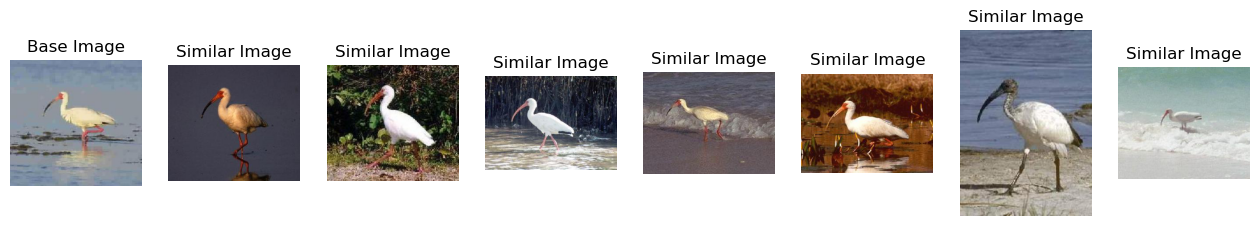

In [34]:
root_dir = "Caltech101/Caltech101/train"
show_images(root_dir)

In [35]:
#Querying the AnnoyIndex    
base_image, base_label, similar_images_df = get_similar_images_annoy(1000)

print('Base Image Id:', base_image)
print('Base Image Label:', base_label)

#Dataframe of similar images
similar_images_df

998.366117477417 ms
Base Image Id: image_0358.jpg
Base Image Label: Motorbikes


,img_id,img_repr,label
915,image_0228.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
1008,image_0372.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
1244,image_0710.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
857,image_0143.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
958,image_0296.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
1282,image_0758.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
918,image_0236.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes


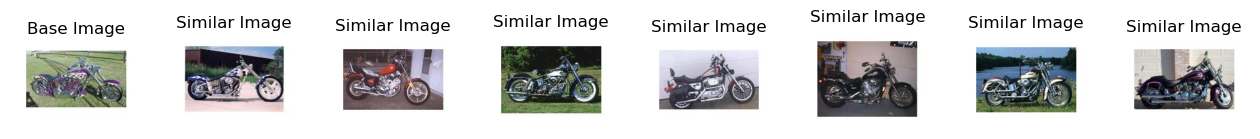

In [36]:
root_dir = "Caltech101/Caltech101/train"
show_images(root_dir)

In [37]:
#Querying the AnnoyIndex    
base_image, base_label, similar_images_df = get_similar_images_annoy(6000)

print('Base Image Id:', base_image)
print('Base Image Label:', base_label)

#Dataframe of similar images
similar_images_df

769.6411609649658 ms
Base Image Id: image_0022.jpg
Base Image Label: wheelchair


,img_id,img_repr,label
6013,image_0040.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0046139513, 0...",wheelchair
2468,image_0028.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",cannon
1032,image_0408.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Motorbikes
5988,image_0007.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",wheelchair
6003,image_0025.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",wheelchair
5985,image_0004.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",wheelchair
2474,image_0036.jpg,"[0.0, 0.0, 0.0, 0.0022908864, 0.0, 0.0, 0.0, 0...",cannon


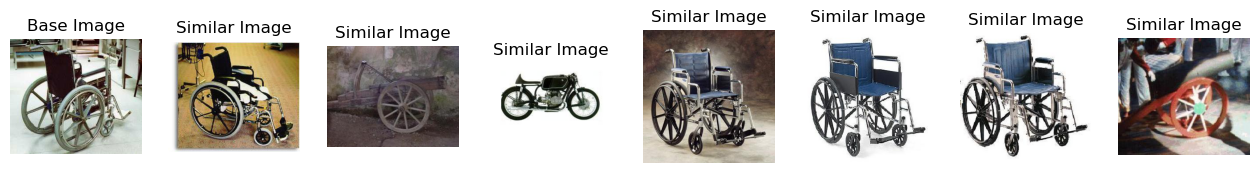

In [38]:
root_dir = "Caltech101/Caltech101/train"
show_images(root_dir)
#not right but visually they are similar

In [43]:
#Querying the AnnoyIndex    
base_image, base_label, similar_images_df = get_similar_images_annoy(2023)

print('Base Image Id:', base_image)
print('Base Image Label:', base_label)

#Dataframe of similar images
similar_images_df

1025.2292156219482 ms
Base Image Id: image_0033.jpg
Base Image Label: bass


,img_id,img_repr,label
2027,image_0038.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010271387, 0....",bass
2022,image_0031.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bass
2031,image_0044.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011480732, 0...",bass
2028,image_0039.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bass
2003,image_0001.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bass
2038,image_0051.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",bass
3792,image_0030.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009542952, 0...",hawksbill


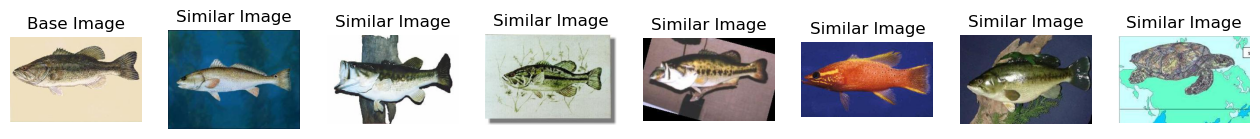

In [44]:
root_dir = "Caltech101/Caltech101/train"
show_images(root_dir)
#not right but visually they are similar